# Build a Neural Network

In [12]:
# Import dependencies
import pandas as pd
import matplotlib as plt
import time
import sklearn as skl
import tensorflow as tf

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [4]:
# Create DataFrame from CSV
t0 = time.time()
filtered_lyric_TF_df = pd.read_csv('../../Data/filtered_lyric_TF.csv')
filtered_lyric_TF_df = filtered_lyric_TF_df.drop([0,1])
filtered_lyric_TF_df.index = filtered_lyric_TF_df.index - 2
t1 = time.time()
print(f'Run time: {t1-t0} seconds')
filtered_lyric_TF_df.head(3)

Run time: 55.38019800186157 seconds


,song_name,artist_name,category_name,category_id,genre_list,audio_ft_danceability,audio_ft_energy,audio_ft_key,audio_ft_mode,audio_ft_speechiness,...,entirely,basket,car,shawn,nothingness,amused,corners,interlude,sting,axis
0,willow,Taylor Swift,pop,8.0,"['dance', 'pop']",0.392,0.574,7.0,1.0,0.1700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Stay Next To Me (with Chelsea Cutler),Quinn XCII,pop,8.0,"['indie', 'pop', 'electropop']",0.581,0.584,2.0,1.0,0.2840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,WITHOUT YOU,The Kid LAROI,pop,8.0,['australian'],0.662,0.413,0.0,1.0,0.0299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
# Define the features set
X = filtered_lyric_TF_df.copy()
X = X.drop(['song_name', 'artist_name', 'category_name', 'category_id', 'genre_list'], axis=1)
X.head(3)

,audio_ft_danceability,audio_ft_energy,audio_ft_key,audio_ft_mode,audio_ft_speechiness,audio_ft_acousticness,audio_ft_instrumentalness,audio_ft_liveness,audio_ft_valence,audio_ft_tempo,...,entirely,basket,car,shawn,nothingness,amused,corners,interlude,sting,axis
0,0.392,0.574,7.0,1.0,0.1700,0.8330,0.00179,0.145,0.529,81.112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.581,0.584,2.0,1.0,0.2840,0.0805,0.00000,0.366,0.756,179.954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.662,0.413,0.0,1.0,0.0299,0.2130,0.00000,0.134,0.467,93.005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
# Define the target set
y = filtered_lyric_TF_df['category_id'].ravel()
y[:5]

array([8., 8., 8., 8., 8.])

In [102]:
# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6010, 12020)
(2004, 12020)
(6010,)
(2004,)


In [90]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Fitting the Model

In [67]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [68]:
# Add the first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=len(X.columns)))

In [69]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [70]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 12021     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 2         
Total params: 12,023
Trainable params: 12,023
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train and Test the Neural Network

In [72]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
188/188 [==============================] - 0s 2ms/step - loss: -23.2608 - accuracy: 0.0103
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: -130.4368 - accuracy: 0.0103
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: -321.8388 - accuracy: 0.0103
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: -595.4487 - accuracy: 0.0103
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: -948.4146 - accuracy: 0.0103
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: -1375.3978 - accuracy: 0.0103
Epoch 7/100
188/188 [==============================] - 0s 2ms/step - loss: -1871.2058 - accuracy: 0.0103
Epoch 8/100
188/188 [==============================] - 0s 2ms/step - loss: -2433.1062 - accuracy: 0.0103
Epoch 9/100
188/188 [==============================] - 0s 1ms/step - loss: -3057.9910 - accuracy: 0.0103
Epoch 10/100
188/188 [==============================] - 0s 1m

188/188 [==============================] - 0s 2ms/step - loss: -143409.0312 - accuracy: 0.0103: 0s - loss: -145488.3906 - accuracy: 
Epoch 78/100
188/188 [==============================] - 0s 2ms/step - loss: -146751.8438 - accuracy: 0.0103
Epoch 79/100
188/188 [==============================] - 0s 2ms/step - loss: -150128.7500 - accuracy: 0.0103
Epoch 80/100
188/188 [==============================] - 0s 2ms/step - loss: -153544.5625 - accuracy: 0.0103
Epoch 81/100
188/188 [==============================] - 0s 2ms/step - loss: -157000.2969 - accuracy: 0.0103
Epoch 82/100
188/188 [==============================] - 0s 2ms/step - loss: -160492.5469 - accuracy: 0.0103
Epoch 83/100
188/188 [==============================] - 0s 2ms/step - loss: -164019.3125 - accuracy: 0.0103
Epoch 84/100
188/188 [==============================] - 0s 2ms/step - loss: -167580.5781 - accuracy: 0.0103
Epoch 85/100
188/188 [==============================] - 0s 2ms/step - loss: -171176.1094 - accuracy: 0.0103
Epo

<AxesSubplot:>

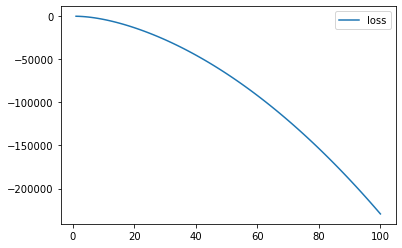

In [73]:
# Create a DataFrame containing history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history['loss'])+1))

# Plot the loss
history_df.plot(y='loss')

<AxesSubplot:>

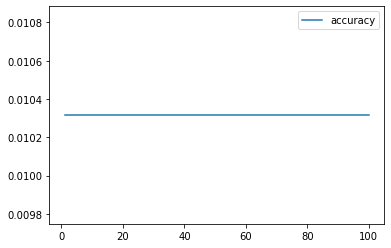

In [74]:
# Plot the accuracy
history_df.plot(y='accuracy')

In [75]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

63/63 - 0s - loss: -1.6907e+05 - accuracy: 0.0105
Loss: -169065.046875, Accuracy: 0.010479042306542397


In [91]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
188/188 [==============================] - 1s 3ms/step - loss: -258.8247 - accuracy: 0.0101
Epoch 2/50
188/188 [==============================] - 1s 3ms/step - loss: -6946.2148 - accuracy: 0.0103: 0s - loss: -6642.0513 - accuracy: 0.01
Epoch 3/50
188/188 [==============================] - 1s 3ms/step - loss: -40283.0391 - accuracy: 0.0103
Epoch 4/50
188/188 [==============================] - 0s 2ms/step - loss: -123222.0312 - accuracy: 0.0103
Epoch 5/50
188/188 [==============================] - 1s 3ms/step - loss: -275091.9375 - accuracy: 0.0103
Epoch 6/50
188/188 [==============================] - 1s 3ms/step - loss: -521349.8750 - accuracy: 0.0103
Epoch 7/50
188/188 [==============================] - 1s 3ms/step - loss: -871439.9375 - accuracy: 0.0103
Epoch 8/50
188/188 [==============================] - 1s 3ms/step - loss: -1334036.7500 - accuracy: 0.0103
Epoch 9/50
188/188 [==============================] - 0s 3ms/step - loss: -1917001.6250 - accuracy: 0.0103
Epoch 10/5

In [86]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

63/63 - 0s - loss: -3.4605e+10 - accuracy: 0.0105
Loss: -34605125632.0, Accuracy: 0.010479042306542397


# Multiple-Neuron Neural Network

In [94]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [95]:
# Add the input and hidden layer
number_inputs = len(X_train_scaled[0])
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [97]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_train_scaled, y_train, epochs=100, shuffle=True)

Epoch 1/100
188/188 [==============================] - 1s 3ms/step - loss: -62.5640 - accuracy: 0.0136
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: -391.0019 - accuracy: 0.0136
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: -856.5234 - accuracy: 0.0133
Epoch 4/100
188/188 [==============================] - 1s 3ms/step - loss: -1478.4001 - accuracy: 0.0130A: 0s - loss: -1273.9006 - 
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: -2263.1702 - accuracy: 0.0141
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: -3217.3105 - accuracy: 0.0133
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: -4340.5752 - accuracy: 0.0111
Epoch 8/100
188/188 [==============================] - 1s 3ms/step - loss: -5626.9717 - accuracy: 0.0103
Epoch 9/100
188/188 [==============================] - 1s 7ms/step - loss: -7070.5317 - accuracy: 0.0103
Epoch 10/100
188/188 [==========

188/188 [==============================] - 1s 3ms/step - loss: -461791.8750 - accuracy: 0.0103
Epoch 77/100
188/188 [==============================] - 0s 2ms/step - loss: -473932.7188 - accuracy: 0.0103
Epoch 78/100
188/188 [==============================] - 0s 2ms/step - loss: -486241.8438 - accuracy: 0.0103
Epoch 79/100
188/188 [==============================] - 0s 2ms/step - loss: -498714.6562 - accuracy: 0.0103
Epoch 80/100
188/188 [==============================] - 0s 2ms/step - loss: -511349.7500 - accuracy: 0.0103
Epoch 81/100
188/188 [==============================] - 0s 2ms/step - loss: -524154.8125 - accuracy: 0.0103
Epoch 82/100
188/188 [==============================] - 0s 2ms/step - loss: -537130.6250 - accuracy: 0.0103
Epoch 83/100
188/188 [==============================] - 0s 2ms/step - loss: -550276.2500 - accuracy: 0.0103
Epoch 84/100
188/188 [==============================] - 0s 2ms/step - loss: -563583.3125 - accuracy: 0.0103
Epoch 85/100
188/188 [===================

In [103]:
# Evaluate the model using the test data
model_loss, model_accuracy = new_model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

RuntimeError: Data adapters should be mutually exclusive for handling inputs. Found multiple adapters [<class 'tensorflow.python.keras.engine.data_adapter.TensorLikeDataAdapter'>, <class 'tensorflow.python.keras.engine.data_adapter.GeneratorDataAdapter'>] to handle input: <class 'pandas.core.frame.DataFrame'>, <class 'numpy.ndarray'>

# Synaptic Boost

## Skill Drill:
Try plotting a variable using Pandas' Series.plot method to look for outliers that can help identify if a particular numerical variable is causing confusion in a model. <br>
Try leaving out a noisy variable from the rest of the training features and see if the model performs better.